In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

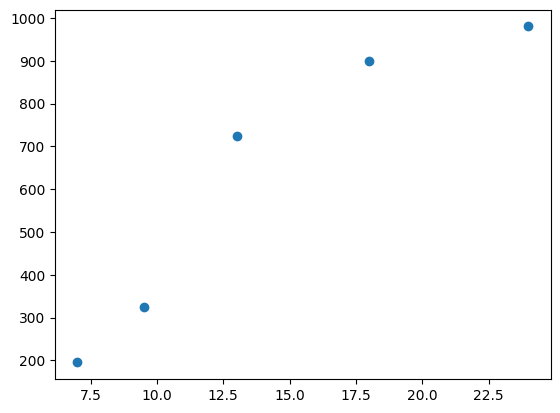

In [2]:
X = np.array(([7],[9.5],[13],[18],[24]))
y = np.array([195,325,725,900,980])
plt.scatter(X,y)
plt.show()

In [3]:
reg = LinearRegression()
reg.fit(X,y)

print("reg.coef_:",reg.coef_)
print("reg.intercept_:",reg.intercept_)
m = reg.coef_[0]
m

reg.coef_: [47.9547901]
reg.intercept_: -60.75349838536067


47.95479009687837

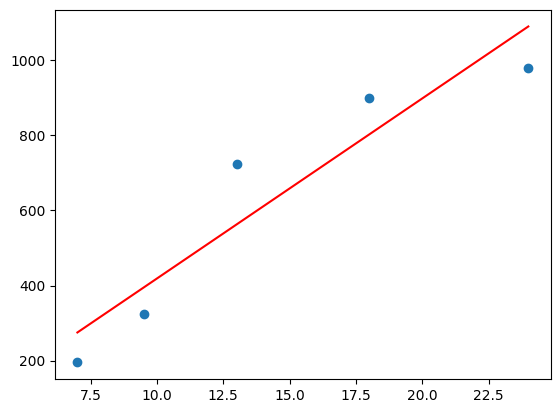

In [4]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color ="red")

In [5]:
y_pred = ((m * X)+300)
y_pred

array([[ 635.68353068],
       [ 755.57050592],
       [ 923.41227126],
       [1163.18622174],
       [1450.91496233]])

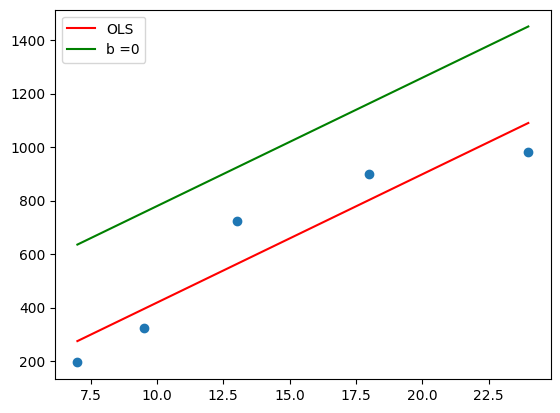

In [6]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color="green",label='b =0')
plt.legend()
plt.show()

In [7]:
b = 300

loss_slope = -2 * np.sum(y-m*X.ravel() - b)
loss_slope

3607.5349838536067

In [8]:
learningRate = 0.1

step_size = loss_slope*learningRate
step_size

360.7534983853607

In [9]:
b = b - step_size
b

-60.75349838536067

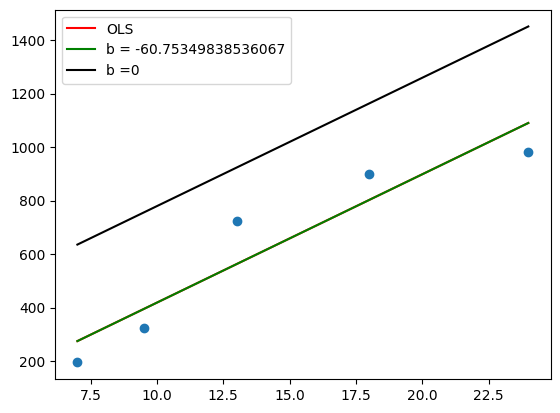

In [10]:
y_pred1 = ((m*X)+b).reshape(5)
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='green',label ='b = {}'.format(b))
plt.plot(X,y_pred,color="black",label='b =0')
plt.legend()
plt.show()


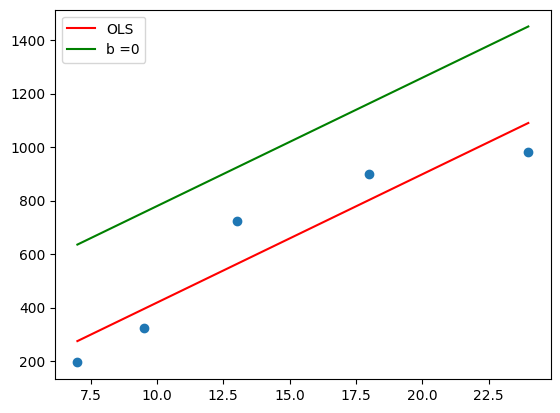

In [11]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color="green",label='b =0')
plt.legend()
plt.show()


 [[ 485.68353068]
 [ 605.57050592]
 [ 773.41227126]
 [1013.18622174]
 [1300.91496233]] 



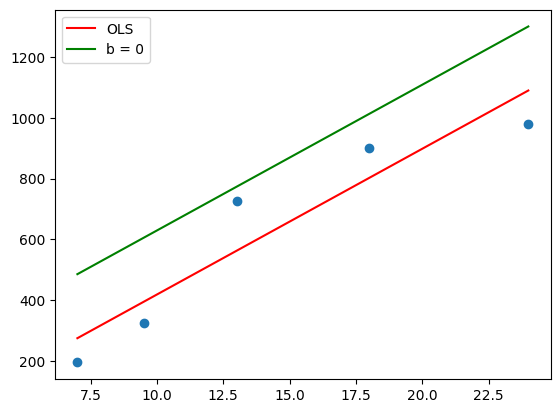


 2107.5349838536067 


 210.75349838536067 



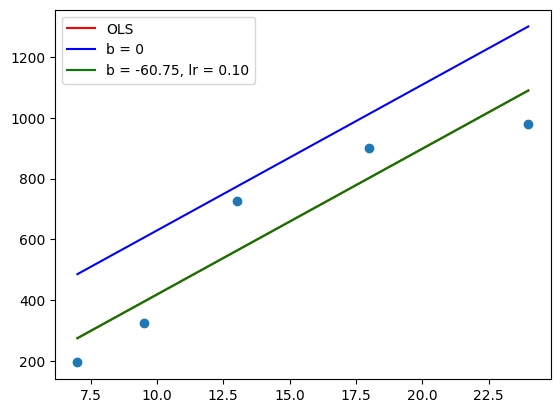


b = -60.75349838536067 



In [12]:

y_pred = ((m*X) + 150)

print('\n',y_pred,'\n')

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color = 'red',label = 'OLS')
plt.plot(X,y_pred,color = 'green',label = 'b = 0')
plt.legend()
plt.show()

b = 150
loss_slope = -2*np.sum(y - m*X.ravel() - b)
print('\n',loss_slope,'\n')

learning_rate = 0.1
step_size = loss_slope*learning_rate
print('\n',step_size,'\n')

b = b - step_size


y_pred1 = ((m*X) + b).reshape(5)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color = 'red',label = 'OLS')
# plt.plot(X,y_pred1,color = 'green',label = 'b = {}'.format(b))
plt.plot(X,y_pred,color = 'blue',label = 'b = 0')
plt.plot(X, y_pred1, color='green', label='b = {:.2f}, lr = {:.2f}'.format(b, learning_rate))
plt.legend()
plt.show()

print('\nb =',b,'\n')

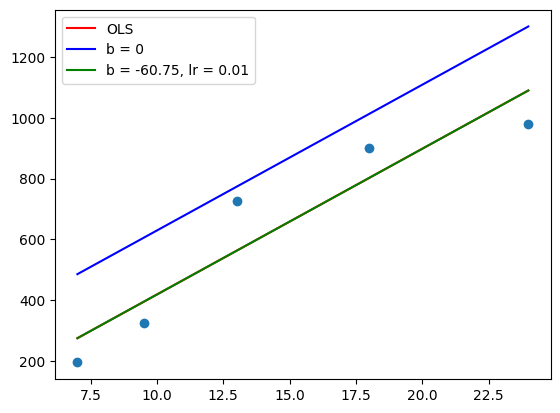


new_b =  -60.75154651562295


In [13]:
def intercept(X, y, m, b, learning_rate, iterations=1):
    for i in range(iterations):
        loss_slope = -2 * np.sum(y - m*X.ravel() - b)
        step_size = loss_slope * learning_rate
        b = b - step_size
    return b

b = 150
learning_rate = 0.01
iterations = 110

new_b = intercept(X, y, m, b, learning_rate, iterations)

y_pred1 = ((m*X) + new_b).reshape(5)

plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred, color='blue', label='b = 0')
plt.plot(X, y_pred1, color='green', label='b = {:.2f}, lr = {:.2f}'.format(new_b, learning_rate))
plt.legend()
plt.show()

print('\nnew_b = ',new_b)

### -60.75349838536067

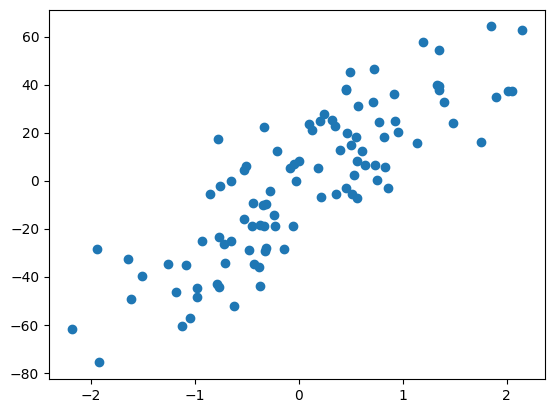

In [14]:
X,y = make_regression(n_samples=100,n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)
plt.scatter(X,y)

#random data leva mate

In [15]:
m_arr = np.linspace(-150, 150 ,10)
b_arr = np.linspace(-150, 150 ,10)
mGrid, bGrid = np.meshgrid(m_arr,b_arr)
final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T
z_arr = []
for i in range(final.shape[0]):
  z_arr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))
z_arr = np.array(z_arr).reshape(10,10)

In [16]:
import plotly.graph_objects as go

fig = go.Figure(data =[go.Surface(x=m_arr, y=b_arr, z=z_arr)])
fig.update_layout(title='Cost function', autosize= False,
                  width=500,height=500,
                  margin=dict(l=65,r=50,b=65,t=90))
fig.show()


In [17]:
b = 100
m=-100
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 20
for i in range(epochs):
  slope_b=0
  slope_m= 0
  cost= 0
  for j in range(X.shape[0]):
    slope_b = slope_b-2*(y[j]- (m*X[j])- b)
    slope_m =slope_m - 2*(y[j] - (m * X[j])- b)*X[j]
    cost = cost + (y[j]- m*X[j]-b)**2

  b = b - (lr * slope_b)
  m = m - (lr * slope_m)
  all_b.append(b)
  all_m.append(m)
  all_cost.append(cost)


In [18]:
import plotly.express as px

fig = px.scatter_3d(x=np.array(all_m).ravel(), y=np.array(all_b).ravel(),z=np.array(all_cost).ravel()*100)
fig.add_trace(go.Surface(x = m_arr, y = b_arr, z =z_arr*100))
fig.show()

In [20]:
import plotly.graph_objects as go

fig = go.Figure(go.Scatter(x=np.array(all_m).ravel(), y=np.array(all_b).ravel(), name='High 2014',
                         line=dict(color='#fff', width=4)))

fig.add_trace(go.Contour(z=z_arr,x=m_arr,y=b_arr))
fig.show()

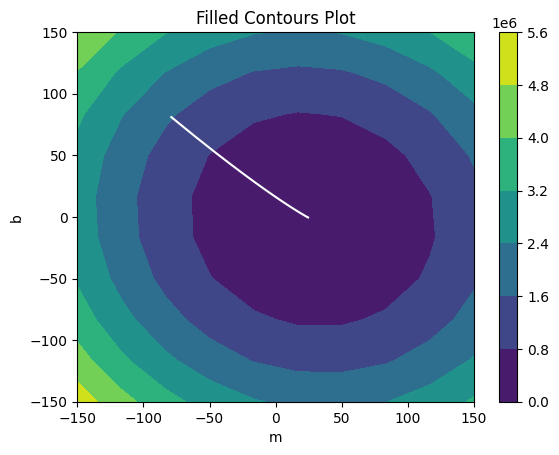

<Figure size 1800x400 with 0 Axes>

In [21]:
fig,ax=plt.subplots(1,1)
plt.figure(figsize=(18,4))
cp = ax.contourf(m_arr, b_arr, z_arr)
ax.plot(np.array(all_m).ravel(),np.array(all_b).ravel(),color='white')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('m')
ax.set_ylabel('b')
plt.show()